   sepal_length  sepal_width  petal_length  petal_width  type
0           5.1          3.5           1.4          0.2     0
1           4.9          3.0           1.4          0.2     0
2           4.7          3.2           1.3          0.2     0
3           4.6          3.1           1.5          0.2     0
4           5.0          3.6           1.4          0.2     0
各方向方差： [ 4.22484077  0.24224357]
方差所占比例： [ 0.92461621  0.05301557]
[[-1.3059028   0.66358991]
 [-1.32107398 -0.34449998]
 [-1.405936   -0.27905426]
 [-1.33617856 -0.63213207]
 [-1.32749711  0.67845686]]


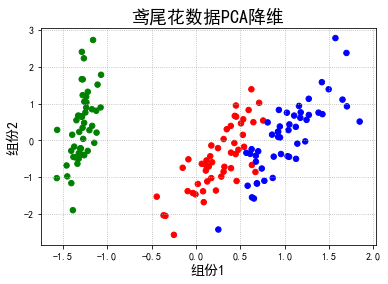

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


最优参数： [  1.  10.   1.]
训练集精确度： 0.952380952381
测试集精确度： 1.0


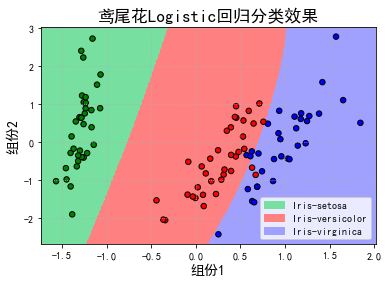

In [3]:
# -*- coding:utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a


if __name__ == '__main__':
    pd.set_option('display.width', 200)
    data = pd.read_csv('iris.data', header=None)
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
    data.rename(columns=dict(zip(np.arange(5), columns)), inplace=True)
    data['type'] = pd.Categorical(data['type']).codes
    print(data.head(5))
    x = data.loc[:, columns[:-1]]
    y = data['type']

    pca = PCA(n_components=2, whiten=True, random_state=0)
    x = pca.fit_transform(x)
    print('各方向方差：', pca.explained_variance_)
    print('方差所占比例：', pca.explained_variance_ratio_)
    print(x[:5])
    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    mpl.rcParams['font.sans-serif'] = u'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark)
    plt.grid(b=True, ls=':')
    plt.xlabel(u'组份1', fontsize=14)
    plt.ylabel(u'组份2', fontsize=14)
    plt.title(u'鸢尾花数据PCA降维', fontsize=18)
    # plt.savefig('1.png')
    plt.show()

    x, x_test, y, y_test = train_test_split(x, y, train_size=0.7)
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=True)),
        ('lr', LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5, fit_intercept=False))
    ])
    model.fit(x, y)
    print('最优参数：', model.get_params('lr')['lr'].C_)
    y_hat = model.predict(x)
    print('训练集精确度：', metrics.accuracy_score(y, y_hat))
    y_test_hat = model.predict(x_test)
    print('测试集精确度：', metrics.accuracy_score(y_test, y_test_hat))

    N, M = 500, 500     # 横纵各采样多少个值
    x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())   # 第0列的范围
    x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())   # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1)   # 测试点
    y_hat = model.predict(x_show)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值的显示
    plt.scatter(x[:, 0], x[:, 1], s=30, c=y, edgecolors='k', cmap=cm_dark)  # 样本的显示
    plt.xlabel(u'组份1', fontsize=14)
    plt.ylabel(u'组份2', fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True, ls=':')
    patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
              mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
              mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
    plt.legend(handles=patchs, fancybox=True, framealpha=0.8, loc='lower right')
    plt.title(u'鸢尾花Logistic回归分类效果', fontsize=17)
    # plt.savefig('2.png')
    plt.show()
